In [1]:
import torch
from torchvision import datasets, transforms
import os
import sys

sys.path.append('../')
from dataSetCombiner import getDataSet

path = r"C:\Users\Dennis\Desktop\Pro\AITest\imgGen\Data"

dataset = getDataSet(path, "FreePBR", 1024, 1024, False, 1)
dataset_len = len(dataset)
print(dataset_len)


263


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import torch

rgb_values = []

percentage = 50

i = 0

for data, _ in dataset:

    # image = np.transpose(data, (1, 2, 0))
    # plt.figure(figsize=(6, 6))
    # plt.imshow(image)
    # plt.axis('off')  # Turn off axis numbers and ticks
    # plt.show()

    reshaped_tensor = data.view(3, -1).t()
    indices = np.random.choice(reshaped_tensor.shape[0], size=(reshaped_tensor.shape[0] * percentage) // 100, replace=False)
    selected_rgb_values = reshaped_tensor[indices]
    rgb_values.extend(selected_rgb_values.tolist())

    i += 1
    if i % 100 == 0:
        print(f"{i}/{dataset_len}")
    #     break

# rgb_values_array = np.array(rgb_values)

100/263
200/263


In [25]:
rgb_values_array255 = np.array(rgb_values * 255).astype(int)

unique_colors, counts = np.unique(rgb_values_array255, axis=0, return_counts=True)
print(f"Anzahl der Farben: {len(unique_colors)}")
for color, count in zip(unique_colors, counts):
    print(f"Farbe: {color}, Anzahl: {count}")

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color 

def toLAB(rgb_values_array, title):
    lab_values_array = color.rgb2lab(rgb_values_array.reshape((1, -1, 3)))

    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = rgb_values_array.reshape((-1, 3))
    ax.scatter(xs=lab_values_array[:, :, 2].flatten(), 
               ys=lab_values_array[:, :, 1].flatten(), 
               zs=lab_values_array[:, :, 0].flatten(), 
               s=10, c=colors, lw=0)
    
    ax.set_xlabel('A', fontsize=9)
    ax.set_ylabel('B', fontsize=9)
    ax.set_zlabel('L', fontsize=9)
    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    ax.set_zlim(0, 100) 

    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='z', labelsize=9)

    plt.title(title, pad=20)
    plt.show()

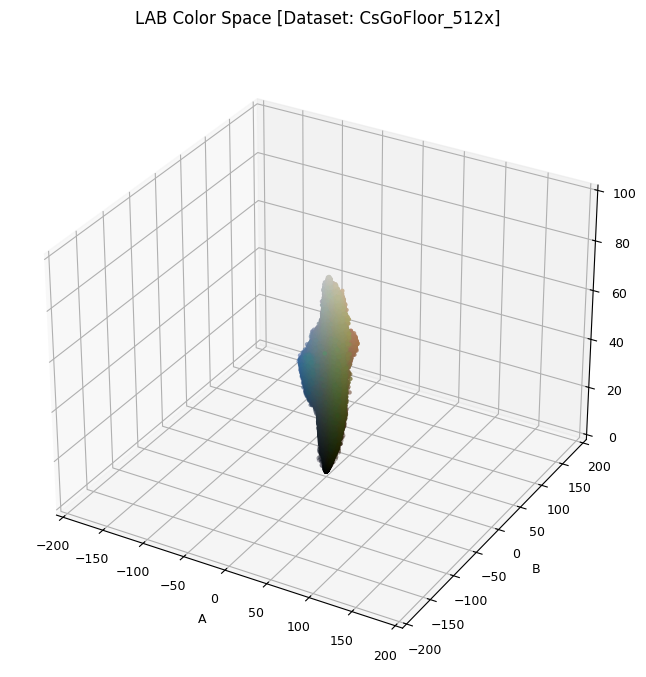

In [94]:
toLAB(rgb_values_array, 'LAB Color Space [Dataset: CsGoFloor_512x]')

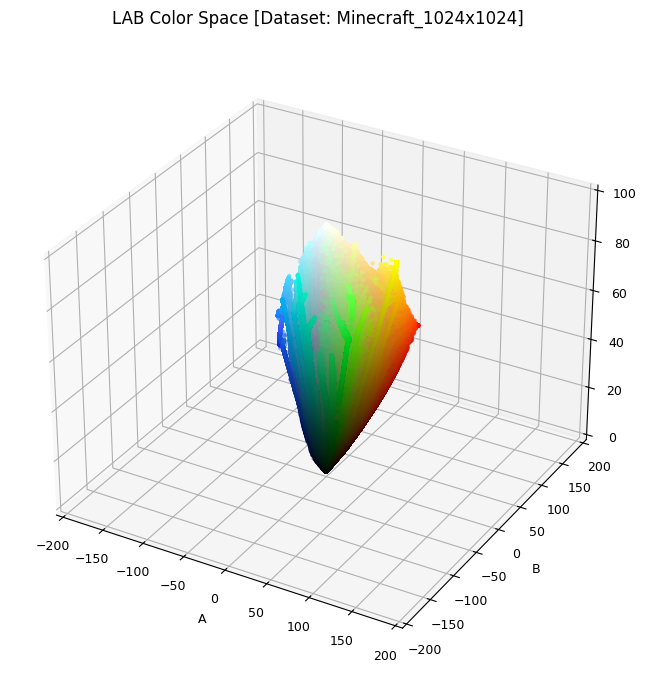

In [90]:
toLAB(rgb_values_array, 'LAB Color Space [Dataset: Minecraft_1024x1024]')

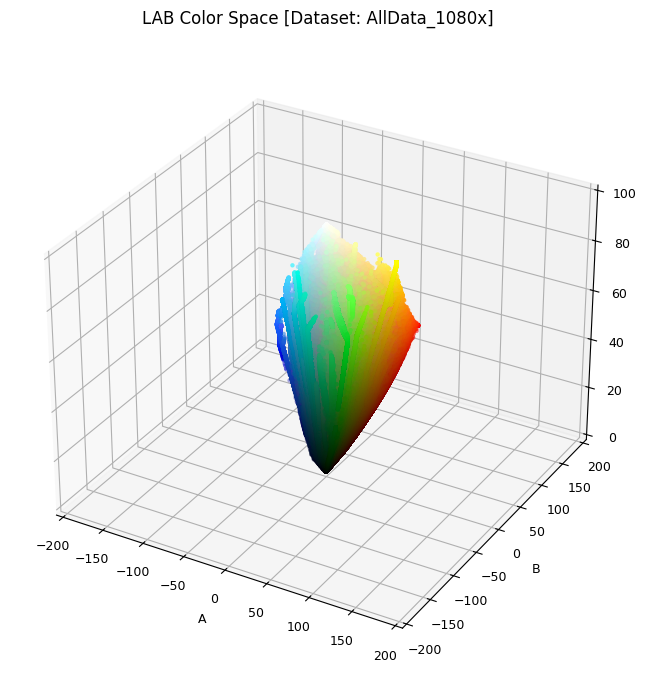

In [87]:
toLAB(rgb_values_array, 'LAB Color Space [Dataset: AllData_1080x]')

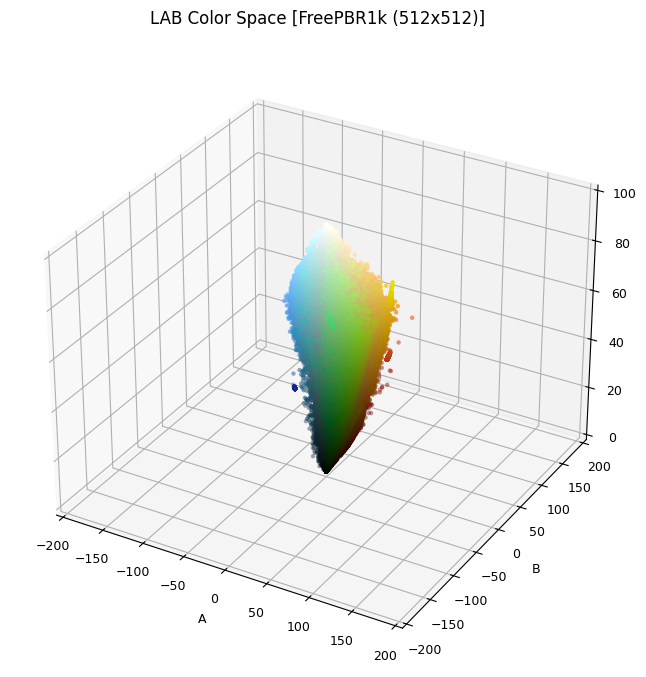

In [79]:
toLAB(rgb_values_array, 'LAB Color Space [FreePBR1k (512x512)]')

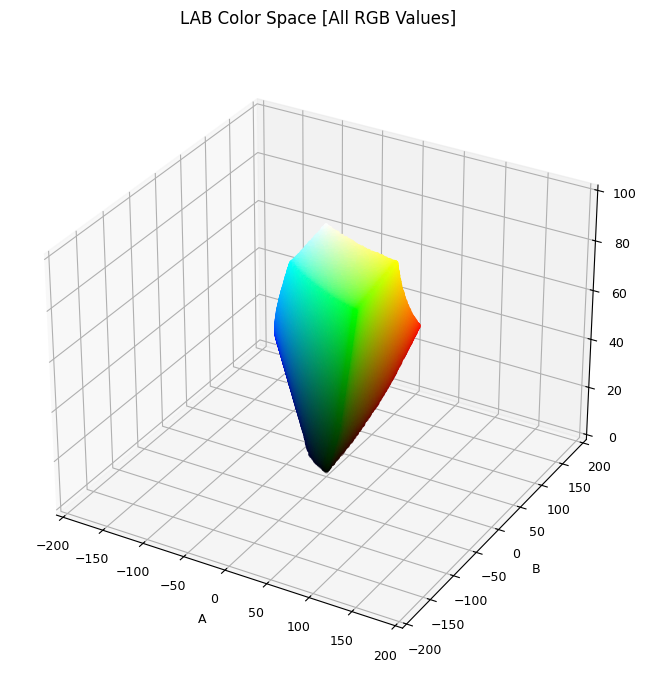

In [78]:
num_samples=1000000
random_rgb_values = np.random.rand(num_samples, 3)
toLAB(random_rgb_values, 'LAB Color Space [All RGB Values]')

C:\Users\Dennis\AppData\Local\Temp\ipykernel_29188\781071590.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(R, G, B, s=log_counts, c=df['Farbe'].apply(lambda x: np.array(x)/255).tolist(), cmap='viridis', alpha=0.6)


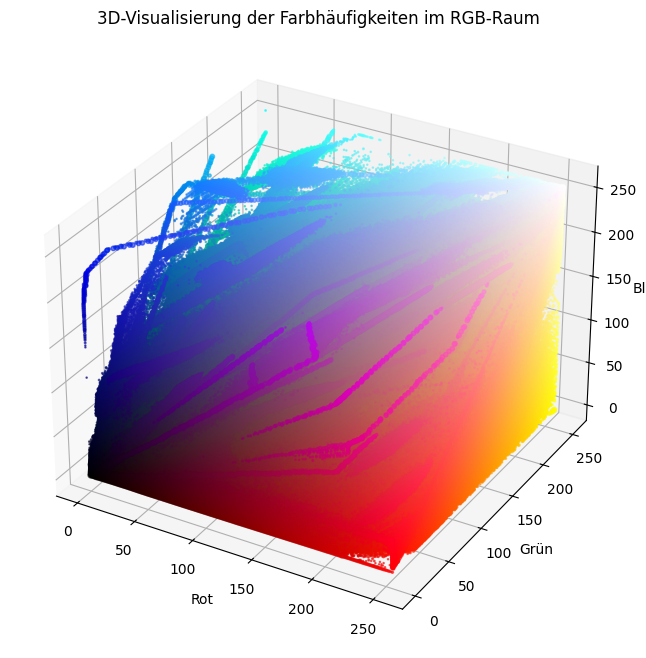

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

datasets = ["FreePBR", "Polyhaven", "Poliigon", "Minecraft_1024x", "CsGoFloor_1080x"]

for data in datasets:

    csv_file_path_sorted = f'output/dataSetAnalysis-{data}.csv'

    df = pd.read_csv(csv_file_path_sorted)

    df['Farbe'] = df['Farbe'].apply(lambda x: [int(val) for val in x.strip("()").split(",")])

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    R = df['Farbe'].apply(lambda x: x[0])
    G = df['Farbe'].apply(lambda x: x[1])
    B = df['Farbe'].apply(lambda x: x[2])

    log_counts = np.log(df['Anzahl'])


    sc = ax.scatter(R, G, B, s=log_counts, c=df['Farbe'].apply(lambda x: np.array(x)/255).tolist(), cmap='viridis', alpha=0.6)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title(f'RGB Color Space [Dataset: {data}]')

    plt.show()


In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datasets = ["FreePBR", "Polyhaven", "Poliigon", "Minecraft_1024x", "CsGoFloor_1080x"]

for data in datasets:

    csv_file_path_sorted = f'output/dataSetAnalysis-{data}.csv'


    df = pd.read_csv(csv_file_path_sorted)

    df['Farbe'] = df['Farbe'].apply(lambda x: [int(val) for val in x.strip("()").split(",")])


    R = df['Farbe'].apply(lambda x: x[0])
    G = df['Farbe'].apply(lambda x: x[1])
    B = df['Farbe'].apply(lambda x: x[2])
    size = np.log(df['Anzahl']) * 20

    # Erstellen des 3D-Plots
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter-Plot
    sc = ax.scatter(R, G, B, s=size, c=df['Farbe'].apply(lambda x: np.array(x)/255).tolist(), alpha=0.6)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title(f'3D-Visualization of color frequencies in RGB-space \n Dataset [{data}]')

    ax.view_init(elev=30, azim=-60 )

    # Animationsfunktion
    def update(frame):
        ax.view_init(elev=30, azim=frame)
        return sc,

    plt.savefig(f'output/{data}.png')

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 4), blit=True)

    ani.save(f'output/{data}.gif', writer='imagemagick')


KeyboardInterrupt: 

In [4]:
#combine all csv files into one
import pandas as pd
import glob

csv_files = glob.glob('~/pro/MasterThesis/code/dataAnalysis/output/*.csv')

combined_data = pd.DataFrame()


for file in csv_files:
    
    df = pd.read_csv(file, names=['Farbe', 'Anzahl'])
    
    
    df['Farbe'] = df['Farbe'].astype(str)
    df['Anzahl'] = pd.to_numeric(df['Anzahl'], errors='coerce').fillna(0).astype(int)
    
    if combined_data.empty:
        combined_data = df
    else:
        combined_data = pd.concat([combined_data, df])


combined_data = combined_data.groupby('Farbe', as_index=False).sum()

combined_data_sorted = combined_data.sort_values(by='Farbe').reset_index(drop=True)

combined_data_sorted.to_csv('output/dataSetAnalysis-combined.csv', index=False)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io, color
from mpl_toolkits.axes_grid1 import make_axes_locatable

plot_lim = 128

def plot_ab(a, b, count, bins=65, ax_main=None):
    if ax_main is None:
        fig, ax_main = plt.subplots(figsize=(8, 8))
    else:
        fig = ax_main.figure

    # Hauptplot
    counts, y_edges, x_edges = np.histogram2d(b, a, bins=bins)
    x_centers = (x_edges[1:] + x_edges[:-1]) / 2
    y_centers = (y_edges[1:] + y_edges[:-1]) / 2
    ol = 100 - 80 * counts / counts.max()  # Lightness scaled for "beauty"
    oa, ob = np.meshgrid(x_centers, y_centers)  # color from center of bins
    ol[counts == 0] = 100.0  # Mask areas with zero counts (white)
    oa[counts == 0] = 0.0
    ob[counts == 0] = 0.0
    lab = np.dstack((ol, oa, ob))
    rgb = color.lab2rgb(lab)
    ax_main.pcolormesh(x_edges, y_edges, rgb)
    ax_main.set_xlabel("a")
    ax_main.set_ylabel("b")
    ax_main.set_xlim(-plot_lim,plot_lim)
    ax_main.set_ylim(-plot_lim,plot_lim)

    # Seiten Histogramme
    divider = make_axes_locatable(ax_main)
    ax_histx = divider.append_axes("top", 0.6, pad=0.0, sharex=ax_main)  
    ax_histy = divider.append_axes("right", 0.6, pad=0.0, sharey=ax_main)  

    ax_histx.hist(a, bins=300, orientation='vertical', color='black', linewidth=0.1)
    ax_histy.hist(b, bins=300, orientation='horizontal', color='black', linewidth=0.1)

    ax_histx.axis('off')
    ax_histy.axis('off')

    ax_histx.set_xlim(ax_main.get_xlim())

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)  
    return ax_main

# datasets = ["FreePBR", "Polyhaven", "Poliigon", "Minecraft_1024x", "CsGoFloor_1080x", "combined"]
datasets = ["1percentminecraftdata"]
# datasets = ["Minecraft_1024x"]

for data_name in datasets:

    csv_file_path_sorted = f'output/dataSetAnalysis-{data_name}.csv'

    data = pd.read_csv(csv_file_path_sorted)
    df = pd.DataFrame(data)

    # Convert color strings to RGB tuples
    df['RGB'] = df['Farbe'].apply(lambda x: tuple(map(int, x.strip("()").split(", "))))

    # Convert from RGB to Lab color space
    df['Lab'] = df['RGB'].apply(lambda rgb: color.rgb2lab(np.array([[rgb]]) / 255)[0,0])

    df['a'] = df['Lab'].apply(lambda x: x[1])
    df['b'] = df['Lab'].apply(lambda x: x[2])

    new_row_df = pd.DataFrame([{'a': -plot_lim, 'b': -plot_lim, 'Anzahl': 0}, {'a': plot_lim, 'b': plot_lim, 'Anzahl': 0}]) 
    df = pd.concat([df, new_row_df], ignore_index=True)

    df['LogAnzahl'] = np.log(df['Anzahl'] +1).round().astype(int)

    plot_ab(df['a'], df['b'], df['LogAnzahl'], bins=300)


FileNotFoundError: [Errno 2] No such file or directory: 'output/dataSetAnalysis-1percentminecraftdata.csv'

C:\Users\Dennis\AppData\Local\Temp\ipykernel_330724\902243579.py:28: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 2 negative Z values that have been clipped to zero
  rgb = color.lab2rgb(lab)


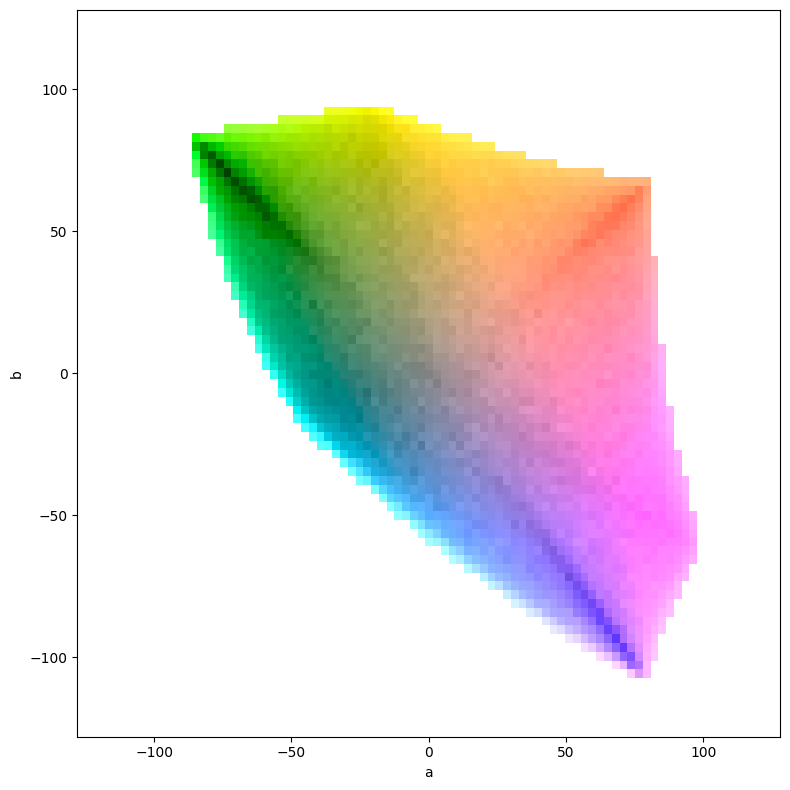

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from mpl_toolkits.axes_grid1 import make_axes_locatable

plot_lim = 128

def plot_ab_from_random_rgb(num_samples=1000000, bins=65):
    # Generate random RGB values
    random_rgb_values = np.random.rand(num_samples, 3) * 255  # Scale to 0-255

    # Convert from RGB to Lab color space directly
    lab_values = np.apply_along_axis(lambda row: color.rgb2lab([[row / 255]])[0, 0], 1, random_rgb_values)
    df = pd.DataFrame(lab_values, columns=['L', 'a', 'b'])

    # Plotting
    fig, ax_main = plt.subplots(figsize=(8, 8))
    counts, y_edges, x_edges = np.histogram2d(df['b'], df['a'], bins=bins)
    x_centers = (x_edges[1:] + x_edges[:-1]) / 2
    y_centers = (y_edges[1:] + y_edges[:-1]) / 2
    ol = 100 - 80 * counts / counts.max()  # Lightness scaled for "beauty"
    oa, ob = np.meshgrid(x_centers, y_centers)
    ol[counts == 0] = 100.0  # Mask areas with zero counts (white)
    oa[counts == 0] = 0.0
    ob[counts == 0] = 0.0
    lab = np.dstack((ol, oa, ob))
    rgb = color.lab2rgb(lab)
    ax_main.pcolormesh(x_edges, y_edges, rgb)
    ax_main.set_xlabel("a")
    ax_main.set_ylabel("b")
    ax_main.set_xlim(-plot_lim, plot_lim)
    ax_main.set_ylim(-plot_lim, plot_lim)

    plt.tight_layout()
    plt.show()

plot_ab_from_random_rgb()
